In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import time
from GFire_utils.AllFunctions import *

pd.set_option('display.max_columns', None)

In [3]:
# Hyperparameters
vegetation = [5] # Classes corresponding to vegetation
columns = ['x','y','z', 'class']
outliers = [135]

xinc = 20 # Meters increment of each point of the groundtruth
yinc = 20

threshold_list = [10] #np.arange(0, 20, 1) # Meters from which we start considering that a vegetation is part of the cover

In [ ]:
# File reading
my_block = pd.read_csv('../toy dataset/input_toydataset.txt', sep=' ', header = None, names = columns)
groundtruth = pd.read_csv('../toy dataset/groundtruth_toydataset.csv', sep=' ', header = None, names = ['x','y','CC'])

In [4]:
# Choosing best threshold
losses = []

xmin = min(groundtruth['x']); xmax = max(groundtruth['x'])
ymin = min(groundtruth['y']); ymax = max(groundtruth['y'])

t0 = time.time()
for th in threshold_list:
    point_cc = []
    gt_cc = []
    for now_x in np.arange(xmin, xmax+xinc, xinc):
        for now_y in np.arange(ymin, ymax+yinc, yinc):

            my_point = my_block[ (my_block['x'] >= now_x) & (my_block['x'] < now_x+xinc) 
                           & (my_block['y'] >= now_y) & (my_block['y'] < now_y+yinc)]
    
            point_cc.append(CC_manual_percentage_app3(my_point, outliers, vegetation))
            aux = groundtruth[ (groundtruth['x'] == now_x) & (groundtruth['y'] == now_y) ][['CC']].iloc[0][0]
            if aux > 100:
                aux = 100
            gt_cc.append( aux ) 
    
    losses.append(r2_score(gt_cc, point_cc))
    
print("Execution time with", len(threshold_list),"iterations:", time.time()-t0)

Execution time with 1 iterations: 6.795591831207275


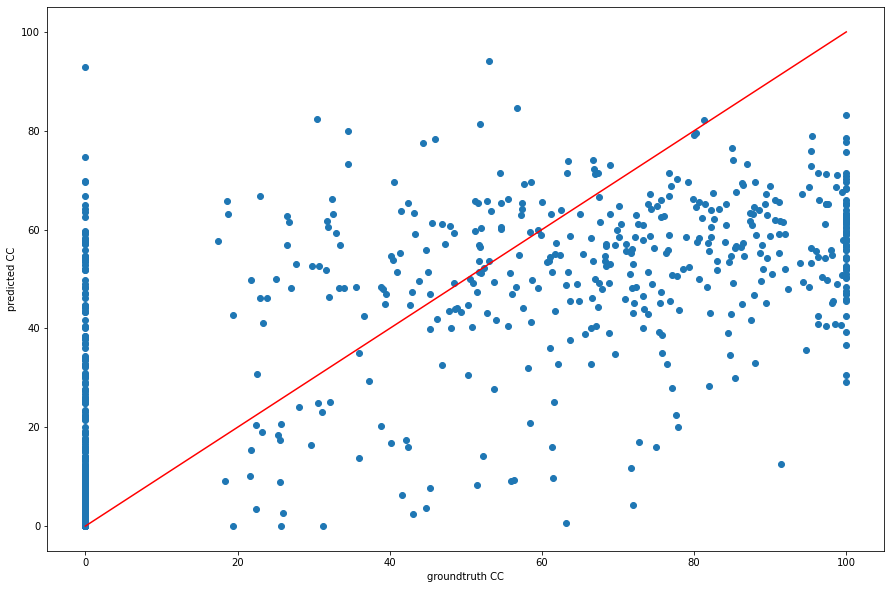

In [5]:
plt.subplots(figsize=(15, 10))

plt.scatter(gt_cc, point_cc)
plt.xlabel('groundtruth CC')
plt.ylabel('predicted CC')
plt.plot([0,100],[0,100], color='red')
plt.show()

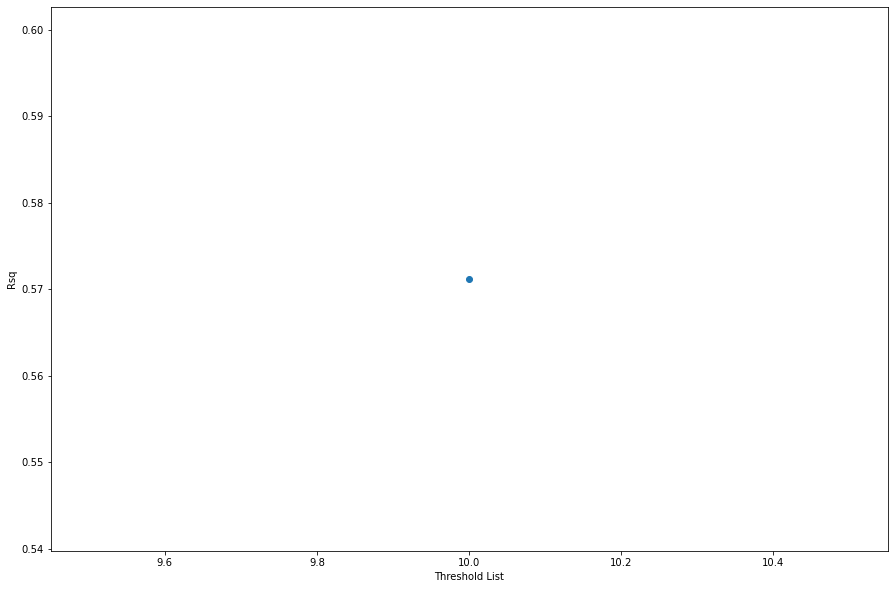

In [179]:
plt.subplots(figsize=(15, 10))

plt.scatter(threshold_list, losses)
plt.plot(threshold_list, losses)

plt.xlabel('Threshold List')
plt.ylabel('Rsq')
plt.show()